In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from scipy import signal

In [134]:
connection = sqlite3.connect('../data/GBPUSD.db')
df = pd.read_sql_query("SELECT * FROM d_2010", connection, parse_dates=True)

In [135]:
std_coef = 10**7

In [136]:
df.head()

,pTime,pOpen,pHigh,pLow,pClose,vcOpen,vcHigh,vcLow,vcClose
0,1262304000,1.61763,1.61763,1.61596,1.61698,3.016108,3.016108,-0.826759,1.520381
1,1262305800,1.61698,1.61702,1.61685,1.61695,1.407596,1.517228,1.051292,1.325372
2,1262307600,1.61695,1.61702,1.61685,1.61690,1.047474,1.260889,0.742596,0.895035
3,1262309400,1.61690,1.61700,1.61682,1.61695,1.214734,1.580460,0.922153,1.397597
4,1262311200,1.61689,1.61705,1.61682,1.61695,1.240695,1.935484,0.936725,1.501241


In [137]:
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'vcOpen', 'vcHigh', 'vcLow', 'vcClose']

In [138]:
df = df.drop(['vcOpen', 'vcHigh', 'vcLow', 'vcClose'], axis=1)

In [139]:
df.head()

,Date,Open,High,Low,Close
0,1262304000,1.61763,1.61763,1.61596,1.61698
1,1262305800,1.61698,1.61702,1.61685,1.61695
2,1262307600,1.61695,1.61702,1.61685,1.61690
3,1262309400,1.61690,1.61700,1.61682,1.61695
4,1262311200,1.61689,1.61705,1.61682,1.61695


In [140]:
date_index = df.Date
df = df.drop('Date', axis=1)
df.index = date_index

In [142]:
window = df.head(20)

In [144]:
window.head()

,Open,High,Low,Close
Date,,,,
1262304000,1.61763,1.61763,1.61596,1.61698
1262305800,1.61698,1.61702,1.61685,1.61695
1262307600,1.61695,1.61702,1.61685,1.61690
1262309400,1.61690,1.61700,1.61682,1.61695
1262311200,1.61689,1.61705,1.61682,1.61695


In [148]:
window_means = pd.DataFrame(window.mean(axis=1), columns=['mean'])

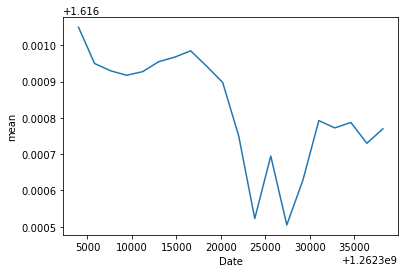

In [152]:
sns.lineplot(data=window_means, y='mean', x='Date');

In [153]:
window_means.head()

,mean
Date,
1262304000,1.617050
1262305800,1.616950
1262307600,1.616930
1262309400,1.616918
1262311200,1.616928


In [177]:
means_data = window_means['mean'].values
maximums = signal.argrelextrema(means_data, np.greater)

In [178]:
maximums

(array([ 7, 12, 15, 17], dtype=int64),)

In [179]:
maximums_points = []
maximums_date = []

for maximum in maximums:
    maximums_points.append(means_data[maximum])
    maximums_date.append(window.index[maximum])

In [180]:
maximums_points

[array([1.616985 , 1.616695 , 1.6167925, 1.6167875])]

In [181]:
maximums_date

[Int64Index([1262316600, 1262325600, 1262331000, 1262334600], dtype='int64', name='Date')]

In [182]:
maximums_points = pd.Series(index=maximums_date[0], data=maximums_points[0])

In [183]:
maximums_points

Date
1262316600    1.616985
1262325600    1.616695
1262331000    1.616793
1262334600    1.616787
dtype: float64

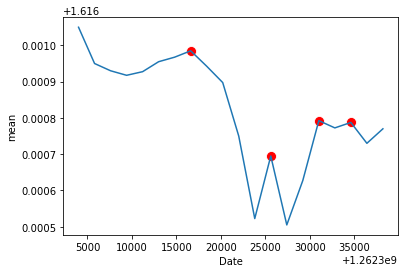

In [188]:
sns.lineplot(data=window_means, y='mean', x='Date')
sns.scatterplot(y=maximums_points.values, x=maximums_points.index, color='r', s=100);

In [206]:
def find_extremums(data, column_name, min_or_max):
    func_values = data[column_name].values
    extremums = signal.argrelextrema(func_values, min_or_max)
    
    extremums_values = []
    extremums_timestamps = []

    for extremum_index in extremums:
        extremums_values.append(func_values[extremum_index])
        extremums_timestamps.append(data.index[extremum_index])
        
    return pd.Series(index=extremums_timestamps[0], data=extremums_values[0])

In [209]:
minimums = find_extremums(window_means, 'mean', np.less)

In [210]:
maximums = find_extremums(window_means, 'mean', np.greater)

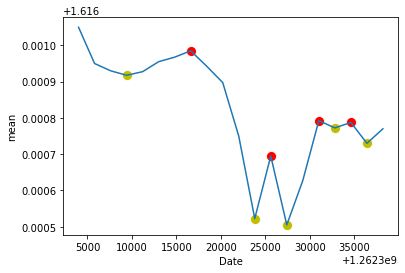

In [211]:
sns.lineplot(data=window_means, y='mean', x='Date')
sns.scatterplot(y=maximums.values, x=maximums.index, color='r', s=100);
sns.scatterplot(y=minimums.values, x=minimums.index, color='y', s=100);